In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [4]:
df = pd.read_csv('../data/eda_posts.csv')

In [5]:
df.head()

,author,created_utc,id,num_comments,score,selftext,subreddit,title,period,all_text,all_text_len,all_text_word_len
0,discord,1221835135,72cy3,16,5,NaN,jazz,Anyone know of any dark / evil sounding jazz?,1,Anyone know of any dark evil sounding jazz,42,8
1,smacfarl,1222039404,72p6u,5,0,NaN,jazz,In honor of Soil &amp; Pimp showing us how it'...,1,In honor of Soil Pimp showing us how it's done...,114,21
2,[deleted],1223963408,76zmj,2,2,NaN,jazz,anybody have that record of Charlie Christian ...,1,anybody have that record of Charlie Christian ...,145,26
3,smacfarl,1224683862,78nrr,4,5,NaN,jazz,New Topline Image for Jazz subreddit. Suggesti...,1,New Topline Image for Jazz subreddit Suggestio...,73,11
4,ChefEspeff,1235783273,80wtq,10,2,NaN,jazz,"Teaching yourself Jazz Piano, is it possible?",1,Teaching yourself Jazz Piano is it possible,43,7


In [6]:
# let's encode our classes
# https://benalexkeen.com/mapping-categorical-data-in-pandas/
df['subreddit_code'] = df['subreddit'].astype('category').cat.codes

In [7]:
df.head()

,author,created_utc,id,num_comments,score,selftext,subreddit,title,period,all_text,all_text_len,all_text_word_len,subreddit_code
0,discord,1221835135,72cy3,16,5,NaN,jazz,Anyone know of any dark / evil sounding jazz?,1,Anyone know of any dark evil sounding jazz,42,8,1
1,smacfarl,1222039404,72p6u,5,0,NaN,jazz,In honor of Soil &amp; Pimp showing us how it'...,1,In honor of Soil Pimp showing us how it's done...,114,21,1
2,[deleted],1223963408,76zmj,2,2,NaN,jazz,anybody have that record of Charlie Christian ...,1,anybody have that record of Charlie Christian ...,145,26,1
3,smacfarl,1224683862,78nrr,4,5,NaN,jazz,New Topline Image for Jazz subreddit. Suggesti...,1,New Topline Image for Jazz subreddit Suggestio...,73,11,1
4,ChefEspeff,1235783273,80wtq,10,2,NaN,jazz,"Teaching yourself Jazz Piano, is it possible?",1,Teaching yourself Jazz Piano is it possible,43,7,1


In [8]:
X = df['all_text']
y = df['subreddit_code']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14954,), (4985,), (14954,), (4985,))

In [10]:
y_train.value_counts(normalize = True)

0    0.500401
1    0.499599
Name: subreddit_code, dtype: float64

In [11]:
y_test.value_counts(normalize = True)

0    0.500502
1    0.499498
Name: subreddit_code, dtype: float64

In [12]:
pipe = Pipeline(steps = [('cvec', CountVectorizer()), ('logreg', LogisticRegression())])

pipe_params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__max_features': [2000, 3000, 4000],
    'cvec__min_df': [2, 4],
    'cvec__max_df': [0.8, 0.5, 1.0],
    'logreg__penalty': ['l1', 'l2', 'elasticnet', 'none']
}

gs = GridSearchCV(estimator = pipe, param_grid = pipe_params, n_jobs = -1)
gs.fit(X_train, y_train)
gs.best_estimator_

c:\Users\Gabe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Gabe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Gabe\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Gabe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, s

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.8, max_features=4000, min_df=2,
                                 stop_words='english')),
                ('logreg', LogisticRegression())])

In [13]:
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.972850073558914, 0.9297893681043129)

c:\Users\Gabe\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


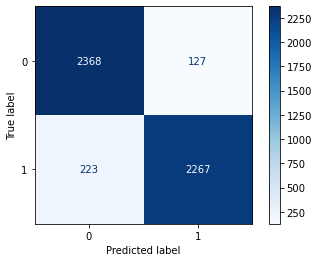

In [14]:
# Get predictions
preds = gs.predict(X_test)
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(gs, X_test, y_test, cmap='Blues', values_format='d');

In [15]:
sensitivity = tp/(tp + fn)
sensitivity

0.9104417670682731

In [16]:
specificity = tn/(tn + fp)
specificity

0.9490981963927856

In [17]:
# ROC/AUC?

# Then could try knn, naive bayes, bagging
# Cvec vs. TFIDF

# stem/lemma
# all other algs
# look thru nlp labs/lessons for suggestions
# top words/bigrams/trigrams?